# Testing

In [19]:
from quantum_ml import metrics

In [20]:
import numpy as np

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
y_true = [100, 2, 3, 4, 1]
y_pred = [100, 2, 3, 4, 1]
sample_weight = [1, 1, 1, 1, 10]

In [23]:
sorted_indices = np.argsort(y_pred)
sorted_indices

array([4, 1, 2, 3, 0], dtype=int64)

In [24]:
sample_weight = np.asarray(sample_weight)
sample_weight
y_true =  np.asarray(y_true)
y_pred = np.asarray(y_pred)

In [25]:
sorted_df = pd.DataFrame({
    "y_true":y_true[sorted_indices],
    "y_pred":y_pred[sorted_indices],
    "sample_weight":sample_weight[sorted_indices],
}
)

In [26]:
sorted_df

,y_true,y_pred,sample_weight
0,1,1,10
1,2,2,1
2,3,3,1
3,4,4,1
4,100,100,1


In [27]:
out = pd.qcut(sorted_df["y_pred"], 3,duplicates="drop")
out

0    (0.999, 2.333]
1    (0.999, 2.333]
2    (2.333, 3.667]
3    (3.667, 100.0]
4    (3.667, 100.0]
Name: y_pred, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.333] < (2.333, 3.667] < (3.667, 100.0]]

In [28]:
sorted_df['pred_group'] = out

In [29]:
sorted_df

,y_true,y_pred,sample_weight,pred_group
0,1,1,10,"(0.999, 2.333]"
1,2,2,1,"(0.999, 2.333]"
2,3,3,1,"(2.333, 3.667]"
3,4,4,1,"(3.667, 100.0]"
4,100,100,1,"(3.667, 100.0]"


In [30]:
grouped_df = sorted_df.groupby('pred_group').mean()[["y_true","y_pred"]].join(sorted_df.groupby('pred_group').sum()[["sample_weight"]])
grouped_df

,y_true,y_pred,sample_weight
pred_group,,,
"(0.999, 2.333]",1.5,1.5,11
"(2.333, 3.667]",3.0,3.0,1
"(3.667, 100.0]",52.0,52.0,2


<AxesSubplot: xlabel='pred_group'>

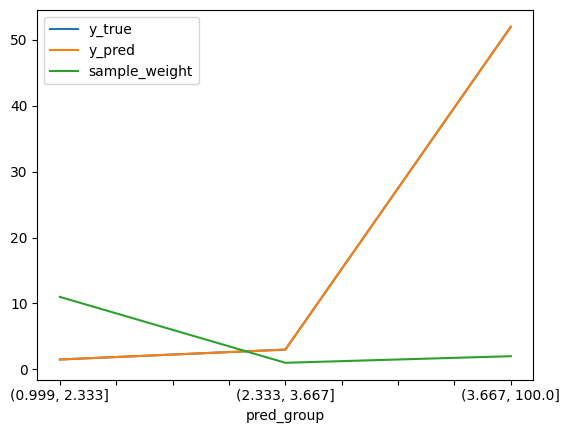

In [31]:
grouped_df.plot()

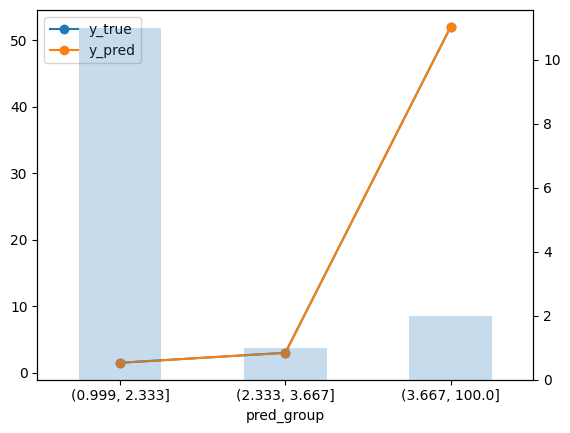

In [32]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

grouped_df[['y_true','y_pred']].plot(linestyle='-',marker='o',ax=ax)
grouped_df['sample_weight'].plot(kind='bar',ax=ax2, alpha=0.25)

plt.show()

In [33]:
grouped_df

,y_true,y_pred,sample_weight
pred_group,,,
"(0.999, 2.333]",1.5,1.5,11
"(2.333, 3.667]",3.0,3.0,1
"(3.667, 100.0]",52.0,52.0,2


## Test 2

In [34]:
from quantum_ml import metrics

In [35]:
dir(metrics)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gini',
 'ginierror',
 'group_data',
 'mean_absolute_error',
 'np',
 'pd',
 'plt']

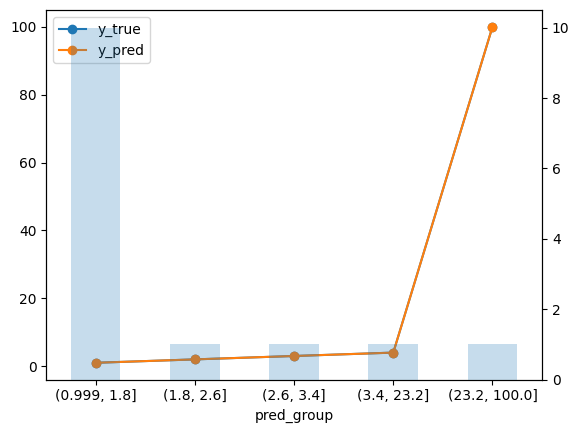

0.8694246929541047

In [36]:
metrics.ginierror(y_true, y_pred ,sample_weight )